# Consignes

 1.       Transformer les profils JSON en données structurées / tabulaires faciles à manipuler, et extraire des features utiles pour la prédiction du flag Fraud.

2.       Fournir une lecture synthétique du dataset, suite à la phase d’exploration des données (EDA), et expliquer les facteurs qui influencent la prédiction du flag de Fraude.

3.       Construire un modèle de prédiction du flag fraud, basé sur les features calculées en 1.

4.       Produire les métriques d’évaluation de la performance du modèle, et des features discriminantes.

# 1 - Transformation des profils JSON en données structurées / tabulaires faciles à manipuler, et extraction des features utiles pour la prédiction du flag Fraud.

<h2><b>1-</b><b style="color:Red;"> a) Transformation des profils JSON en données structurées / tabulaires faciles à manipuler.</b></h2>

In [1]:
import json
with open('C:\\Users\\Studies\\Downloads\\user_profiles.json') as json_file:
    data = json.load(json_file)

In [2]:
data

[{'fraudulent': False,
  'customer': {'customerEmail': 'josephhoward@yahoo.com',
   'customerPhone': '400-108-5415',
   'customerDevice': 'yyeiaxpltf82440jnb3v',
   'customerIPAddress': '8.129.104.40',
   'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
  'orders': [{'orderId': 'vjbdvd',
    'orderAmount': 18,
    'orderState': 'pending',
    'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
   {'orderId': 'yp6x27',
    'orderAmount': 26,
    'orderState': 'fulfilled',
    'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}],
  'paymentMethods': [{'paymentMethodId': 'wt07xm68b',
    'paymentMethodRegistrationFailure': True,
    'paymentMethodType': 'card',
    'paymentMethodProvider': 'JCB 16 digit',
    'paymentMethodIssuer': 'Citizens First Banks'}],
  'transactions': [{'transactionId': 'a9lcj51r',
    'orderId': 'vjbdvd',
    'paymentMethodId': 'wt07xm68b',
    'transactionAmount': 18,
    'transactionFailed': False},
   {'transa

In [3]:
import pandas as pd
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
df=pd.json_normalize(data)

In [4]:
df.head()

,fraudulent,orders,paymentMethods,transactions,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress
0,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb...",josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg...",evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3...",andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz...",rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h...",uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


<h3><b style="color:blue;">** Diviser chaque clé imbriquée dans un dataframe ( Total 4 dataframes )</b></h3>

In [5]:
orders_data = pd.json_normalize(data, record_path='orders', 
                            meta=['fraudulent', ['customer','customerEmail']])

In [6]:
paymentMethods_data = pd.json_normalize(data, record_path='paymentMethods', 
                            meta=['fraudulent', ['customer','customerEmail']])

In [7]:
transactions_data = pd.json_normalize(data, record_path='transactions', 
                            meta=['fraudulent', ['customer','customerEmail']])

In [8]:
customer_data = pd.json_normalize(data, record_path='orders',
                                  meta=['fraudulent',['customer','customerEmail'],['customer','customerPhone'],['customer','customerDevice'],['customer','customerIPAddress'],['customer','customerBillingAddress']])

In [9]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   transactionId           623 non-null    object
 1   orderId                 623 non-null    object
 2   paymentMethodId         623 non-null    object
 3   transactionAmount       623 non-null    int64 
 4   transactionFailed       623 non-null    bool  
 5   fraudulent              623 non-null    object
 6   customer.customerEmail  623 non-null    object
dtypes: bool(1), int64(1), object(5)
memory usage: 29.9+ KB


In [10]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   orderId                 478 non-null    object
 1   orderAmount             478 non-null    int64 
 2   orderState              478 non-null    object
 3   orderShippingAddress    478 non-null    object
 4   fraudulent              478 non-null    object
 5   customer.customerEmail  478 non-null    object
dtypes: int64(1), object(5)
memory usage: 22.5+ KB


In [11]:
paymentMethods_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   paymentMethodId                   342 non-null    object
 1   paymentMethodRegistrationFailure  342 non-null    bool  
 2   paymentMethodType                 342 non-null    object
 3   paymentMethodProvider             342 non-null    object
 4   paymentMethodIssuer               342 non-null    object
 5   fraudulent                        342 non-null    object
 6   customer.customerEmail            342 non-null    object
dtypes: bool(1), object(6)
memory usage: 16.5+ KB


In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   orderId                          478 non-null    object
 1   orderAmount                      478 non-null    int64 
 2   orderState                       478 non-null    object
 3   orderShippingAddress             478 non-null    object
 4   fraudulent                       478 non-null    object
 5   customer.customerEmail           478 non-null    object
 6   customer.customerPhone           478 non-null    object
 7   customer.customerDevice          478 non-null    object
 8   customer.customerIPAddress       478 non-null    object
 9   customer.customerBillingAddress  478 non-null    object
dtypes: int64(1), object(9)
memory usage: 37.5+ KB


In [13]:
transactions_data

,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed,fraudulent,customer.customerEmail
0,a9lcj51r,vjbdvd,wt07xm68b,18,False,False,josephhoward@yahoo.com
1,y4wcv03i,yp6x27,wt07xm68b,26,False,False,josephhoward@yahoo.com
2,5mi94sfw,nlghpa,41ug157xz,45,False,True,evansjeffery@yahoo.com
3,br8ba1nu,uw0eeb,41ug157xz,23,False,True,evansjeffery@yahoo.com
4,a33145ss,bn44oh,y3xp697jx,43,True,True,evansjeffery@yahoo.com
...,...,...,...,...,...,...,...
618,7yilsi1o,1bubxa,7yen1m1q8,25,True,False,dawn05@tucker-brown.com
619,wmh52bns,1bubxa,3zmkegkb8,25,True,False,dawn05@tucker-brown.com
620,c82k5bcv,1bubxa,7yen1m1q8,25,False,False,dawn05@tucker-brown.com
621,xdw33hfp,p0gdbf,3zmkegkb8,19,False,False,dawn05@tucker-brown.com


In [14]:
orders_data

,orderId,orderAmount,orderState,orderShippingAddress,fraudulent,customer.customerEmail
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",False,josephhoward@yahoo.com
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",False,josephhoward@yahoo.com
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",True,evansjeffery@yahoo.com
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,evansjeffery@yahoo.com
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",True,evansjeffery@yahoo.com
...,...,...,...,...,...,...
473,ow1cih,23,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com
474,ak5a9n,32,fulfilled,"750 Sarah Stream\nAndersonfurt, WI 68970",False,dawn05@tucker-brown.com
475,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com
476,p0gdbf,19,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com


In [15]:
customer_data

,orderId,orderAmount,orderState,orderShippingAddress,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
...,...,...,...,...,...,...,...,...,...,...
473,ow1cih,23,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"
474,ak5a9n,32,fulfilled,"750 Sarah Stream\nAndersonfurt, WI 68970",False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"
475,1bubxa,25,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"
476,p0gdbf,19,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"


In [16]:
paymentMethods_data

,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent,customer.customerEmail
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,False,josephhoward@yahoo.com
1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,True,evansjeffery@yahoo.com
2,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,True,evansjeffery@yahoo.com
3,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,True,evansjeffery@yahoo.com
4,m52tx8e1s,False,card,Mastercard,Vertex Bancorp,True,evansjeffery@yahoo.com
...,...,...,...,...,...,...,...
337,1tmkeoxbm,False,card,American Express,Bulwark Trust Corp.,True,ethompson@jackson-sanders.com
338,f0xnu5om9,False,card,JCB 16 digit,His Majesty Bank Corp.,False,dawn05@tucker-brown.com
339,3zmkegkb8,False,paypal,JCB 15 digit,Bastion Banks,False,dawn05@tucker-brown.com
340,7yen1m1q8,False,card,VISA 13 digit,Vertex Bancorp,False,dawn05@tucker-brown.com


<h3><b style="color:blue;">** Regrouper les 4 dataframes, <i style="color:green;">en se basant sur customerEmail et Order ID</i>, pour avoir le Dataframe final, structuré, facile à manipuler et sans redondances </b></h3>

In [17]:
df_test=orders_data.merge(transactions_data,on=['customer.customerEmail','orderId'])

In [18]:
df_test1=df_test.merge(customer_data,on=['customer.customerEmail','orderId'])

In [19]:
df_test_final=df_test1.merge(paymentMethods_data,on='customer.customerEmail')

In [20]:
df_test_final.head()

,orderId,orderAmount_x,orderState_x,orderShippingAddress_x,fraudulent_x,...,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent_y
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",False,...,True,card,JCB 16 digit,Citizens First Banks,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",False,...,True,card,JCB 16 digit,Citizens First Banks,False
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",True,...,True,bitcoin,VISA 16 digit,Solace Banks,True
3,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",True,...,False,card,VISA 16 digit,Vertex Bancorp,True
4,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",True,...,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,True


In [21]:
df_test_final.columns

Index(['orderId', 'orderAmount_x', 'orderState_x', 'orderShippingAddress_x',
       'fraudulent_x', 'customer.customerEmail', 'transactionId',
       'paymentMethodId_x', 'transactionAmount', 'transactionFailed',
       'fraudulent_y', 'orderAmount_y', 'orderState_y',
       'orderShippingAddress_y', 'fraudulent_x', 'customer.customerPhone',
       'customer.customerDevice', 'customer.customerIPAddress',
       'customer.customerBillingAddress', 'paymentMethodId_y',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'fraudulent_y'],
      dtype='object')

In [22]:
L=['orderAmount_x','orderState_x','orderShippingAddress_x','fraudulent_x','paymentMethodId_x']
for i in L:
    df_test_final.drop([i], axis=1,inplace=True)

In [23]:
df_test_final.rename(columns = {'orderState_y':'orderState','orderAmount_y':'orderAmount','fraudulent_y':'fraudulent','orderShippingAddress_y':'orderShippingAddress','paymentMethodId_y':'paymentMethodId'}, inplace = True)

In [24]:
df_test_final.columns

Index(['orderId', 'customer.customerEmail', 'transactionId',
       'transactionAmount', 'transactionFailed', 'fraudulent', 'orderAmount',
       'orderState', 'orderShippingAddress', 'customer.customerPhone',
       'customer.customerDevice', 'customer.customerIPAddress',
       'customer.customerBillingAddress', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'fraudulent'],
      dtype='object')

In [25]:
dataset_final= df_test_final.T.drop_duplicates().T

In [26]:
colsnames=['orderId', 'customer.customerEmail', 'transactionId',
       'transactionAmount', 'transactionFailed', 'orderState',
       'orderShippingAddress', 'customer.customerPhone',
       'customer.customerDevice', 'customer.customerIPAddress',
       'customer.customerBillingAddress', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer','fraudulent']

In [27]:
dataset_final=dataset_final[colsnames]

In [28]:
dataset_final.head()

,orderId,customer.customerEmail,transactionId,transactionAmount,transactionFailed,...,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent
0,vjbdvd,josephhoward@yahoo.com,a9lcj51r,18,False,...,True,card,JCB 16 digit,Citizens First Banks,False
1,yp6x27,josephhoward@yahoo.com,y4wcv03i,26,False,...,True,card,JCB 16 digit,Citizens First Banks,False
2,nlghpa,evansjeffery@yahoo.com,5mi94sfw,45,False,...,True,bitcoin,VISA 16 digit,Solace Banks,True
3,nlghpa,evansjeffery@yahoo.com,5mi94sfw,45,False,...,False,card,VISA 16 digit,Vertex Bancorp,True
4,nlghpa,evansjeffery@yahoo.com,5mi94sfw,45,False,...,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,True


 <h2><b>1-</b><b style="color:Red;"> b) Extraction des features utiles pour la prédiction du flag Fraud. </b></h2>


In [29]:
colsnames_fraud=['customer.customerEmail','transactionAmount', 'transactionFailed',
       'orderState','paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer','fraudulent']

In [30]:
dataset_fraud=dataset_final[colsnames_fraud]

In [31]:
dataset_fraud.head()

,customer.customerEmail,transactionAmount,transactionFailed,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent
0,josephhoward@yahoo.com,18,False,pending,True,card,JCB 16 digit,Citizens First Banks,False
1,josephhoward@yahoo.com,26,False,fulfilled,True,card,JCB 16 digit,Citizens First Banks,False
2,evansjeffery@yahoo.com,45,False,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,True
3,evansjeffery@yahoo.com,45,False,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,True
4,evansjeffery@yahoo.com,45,False,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,True


# 2 Lecture synthétique du dataset, suite à la phase d’exploration des données (EDA), et explication des facteurs qui influencent la prédiction du flag de Fraude.

<h2><b>2-</b><b style="color:red;"> a) EDA</b></h2>

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [33]:
dataset_fraud.shape

(1749, 9)

In [34]:
dataset_fraud.head()

,customer.customerEmail,transactionAmount,transactionFailed,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent
0,josephhoward@yahoo.com,18,False,pending,True,card,JCB 16 digit,Citizens First Banks,False
1,josephhoward@yahoo.com,26,False,fulfilled,True,card,JCB 16 digit,Citizens First Banks,False
2,evansjeffery@yahoo.com,45,False,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,True
3,evansjeffery@yahoo.com,45,False,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,True
4,evansjeffery@yahoo.com,45,False,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,True


In [35]:
dataset_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customer.customerEmail            1749 non-null   object
 1   transactionAmount                 1749 non-null   object
 2   transactionFailed                 1749 non-null   object
 3   orderState                        1749 non-null   object
 4   paymentMethodRegistrationFailure  1749 non-null   object
 5   paymentMethodType                 1749 non-null   object
 6   paymentMethodProvider             1749 non-null   object
 7   paymentMethodIssuer               1749 non-null   object
 8   fraudulent                        1749 non-null   object
dtypes: object(9)
memory usage: 201.2+ KB


<h3><b style="color:blue;">** Distribution de la caractéristique numérique <i>(TransactionAmount)</i> </b></h3>

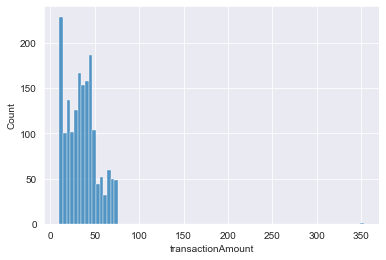

In [36]:
sns.histplot(dataset_fraud['transactionAmount'])
plt.show()

C:\Users\Studies\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactionAmount', ylabel='Density'>

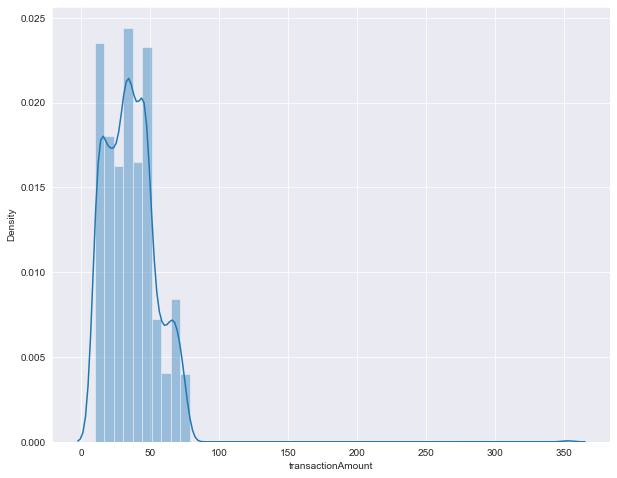

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(dataset_fraud.transactionAmount)

In [38]:
dataset_fraud['transactionAmount'].mean()

36.080045740423095

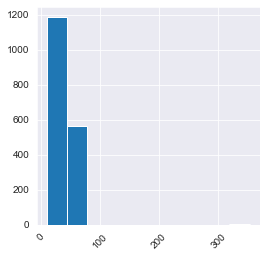

In [39]:
dataset_fraud['transactionAmount'].hist(figsize=(4,4), xrot=45)
plt.show()

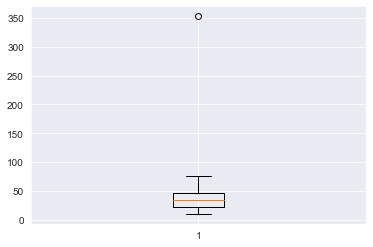

In [40]:
plt.boxplot(dataset_fraud['transactionAmount'])
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [41]:
#On calcule Q1
q1=dataset_fraud["transactionAmount"].quantile(q=0.25)
#On calcule Q3
q3=dataset_fraud["transactionAmount"].quantile(q=0.75)
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR

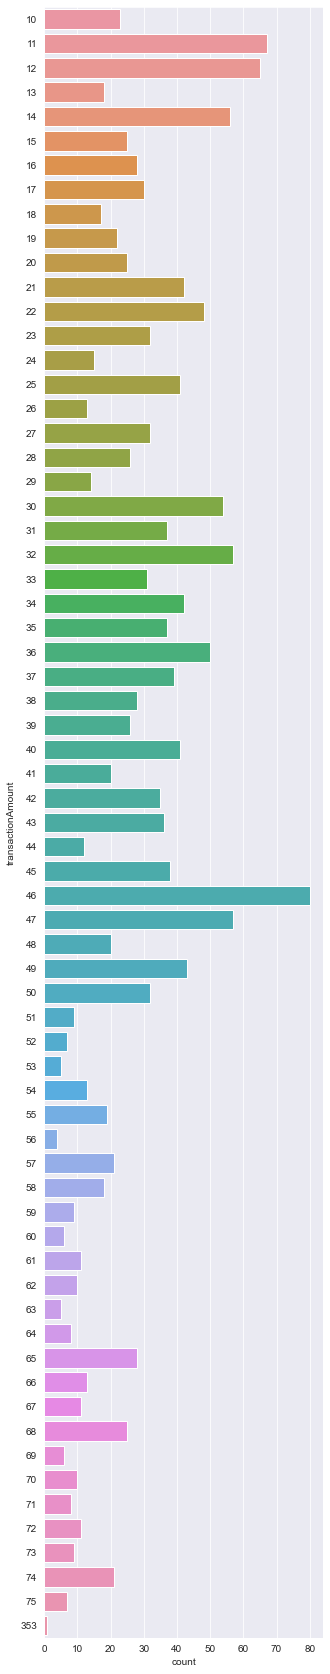

In [94]:
sns.countplot(y='transactionAmount', data=dataset_fraud)
plt.rcParams["figure.figsize"] = (1,21)
plt.show()

In [42]:
dataset_fraud.describe()

,customer.customerEmail,transactionAmount,transactionFailed,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent
count,1749,1749,1749,1749,1749,1749,1749,1749,1749
unique,136,67,2,3,2,4,10,19,2
top,johnlowery@gmail.com,46,False,fulfilled,False,card,JCB 16 digit,Vertex Bancorp,True
freq,308,80,1325,1517,1579,1265,387,245,1075


<h3><b style="color:blue;">** Distribution des caractéristiques catégoriques</b></h3>

In [43]:
columns_categorical=['transactionFailed', 'orderState',
'paymentMethodRegistrationFailure','paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer','fraudulent']

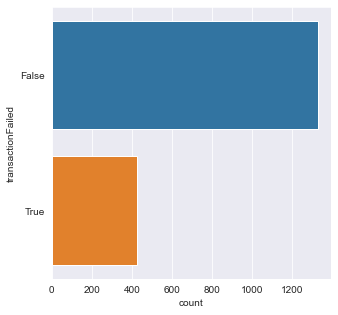

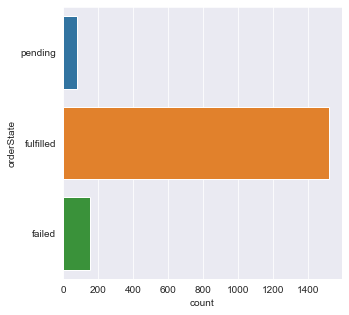

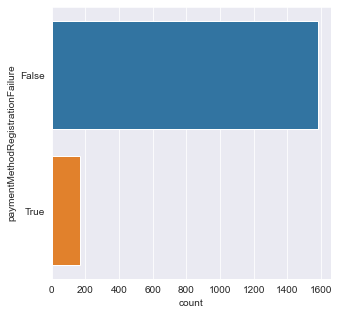

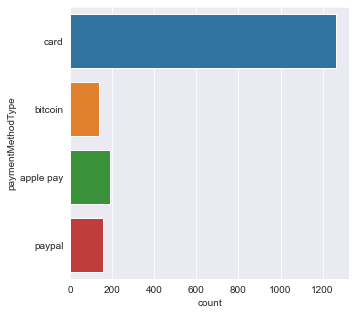

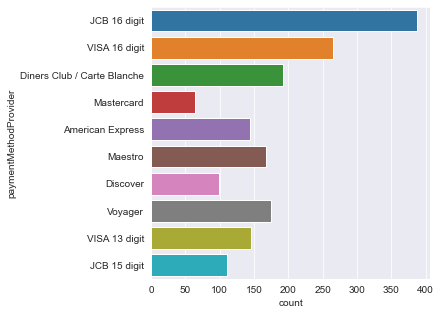

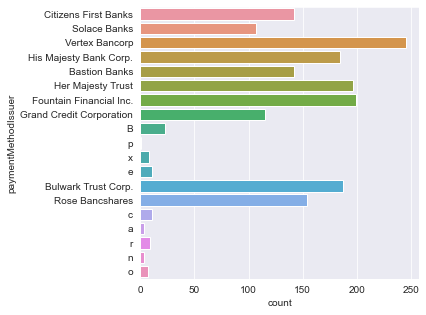

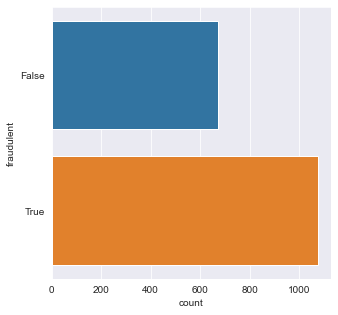

In [44]:
for column in columns_categorical:
        sns.countplot(y=column, data=dataset_fraud)
        plt.show()

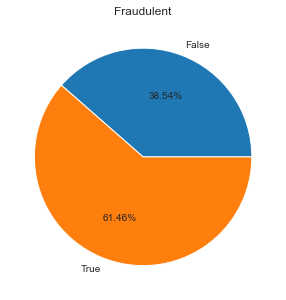

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Fraudulent')
dataset_fraud.groupby('fraudulent').size().plot(y='fraudulent',kind='pie', legend=False, autopct='%1.2f%%', ax=ax)
ax.set_ylabel(None)
plt.show()

<h3><b style="color:blue;">Segmentation de la variable <i style=color:green>transactionAmount</i> à l'aide de quelques caractéristiques catégoriques.</b></h3>

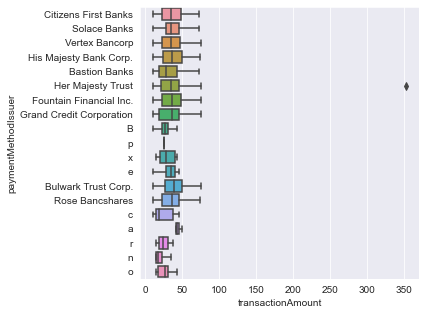

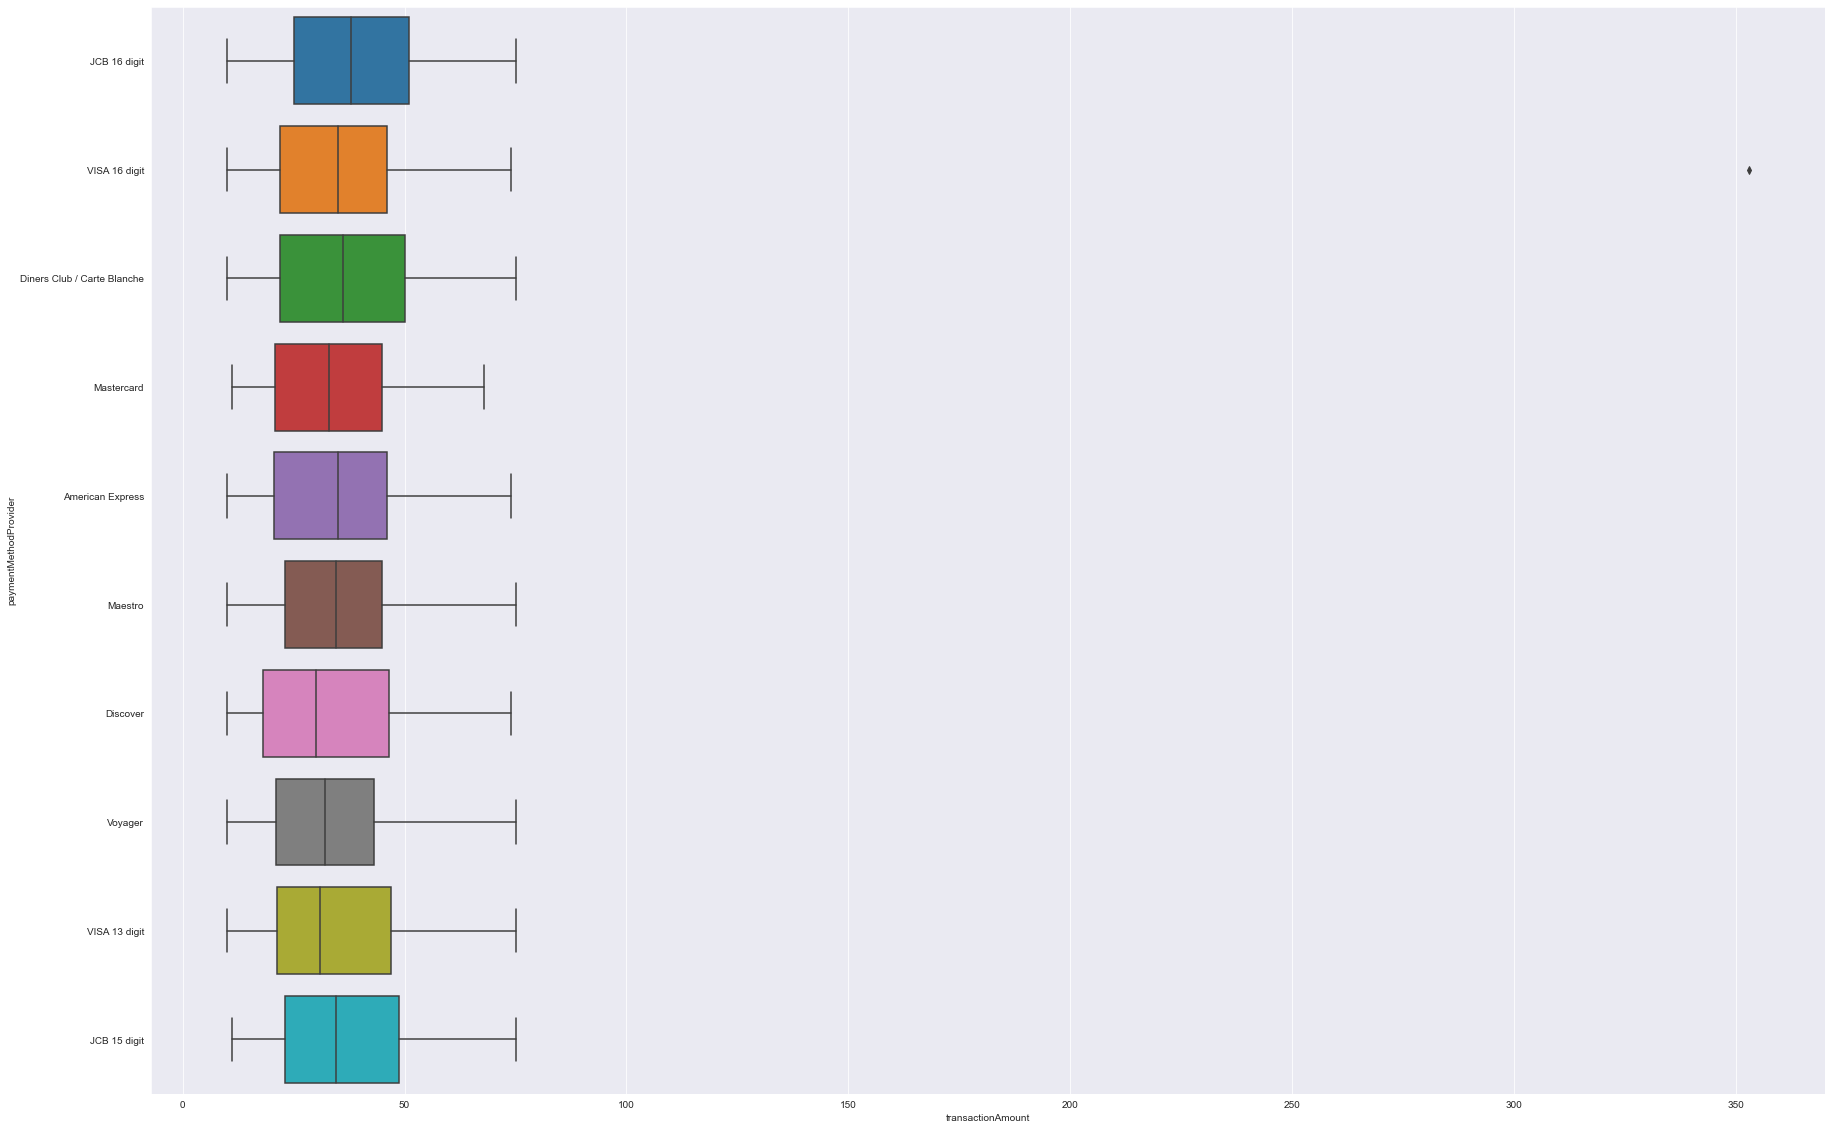

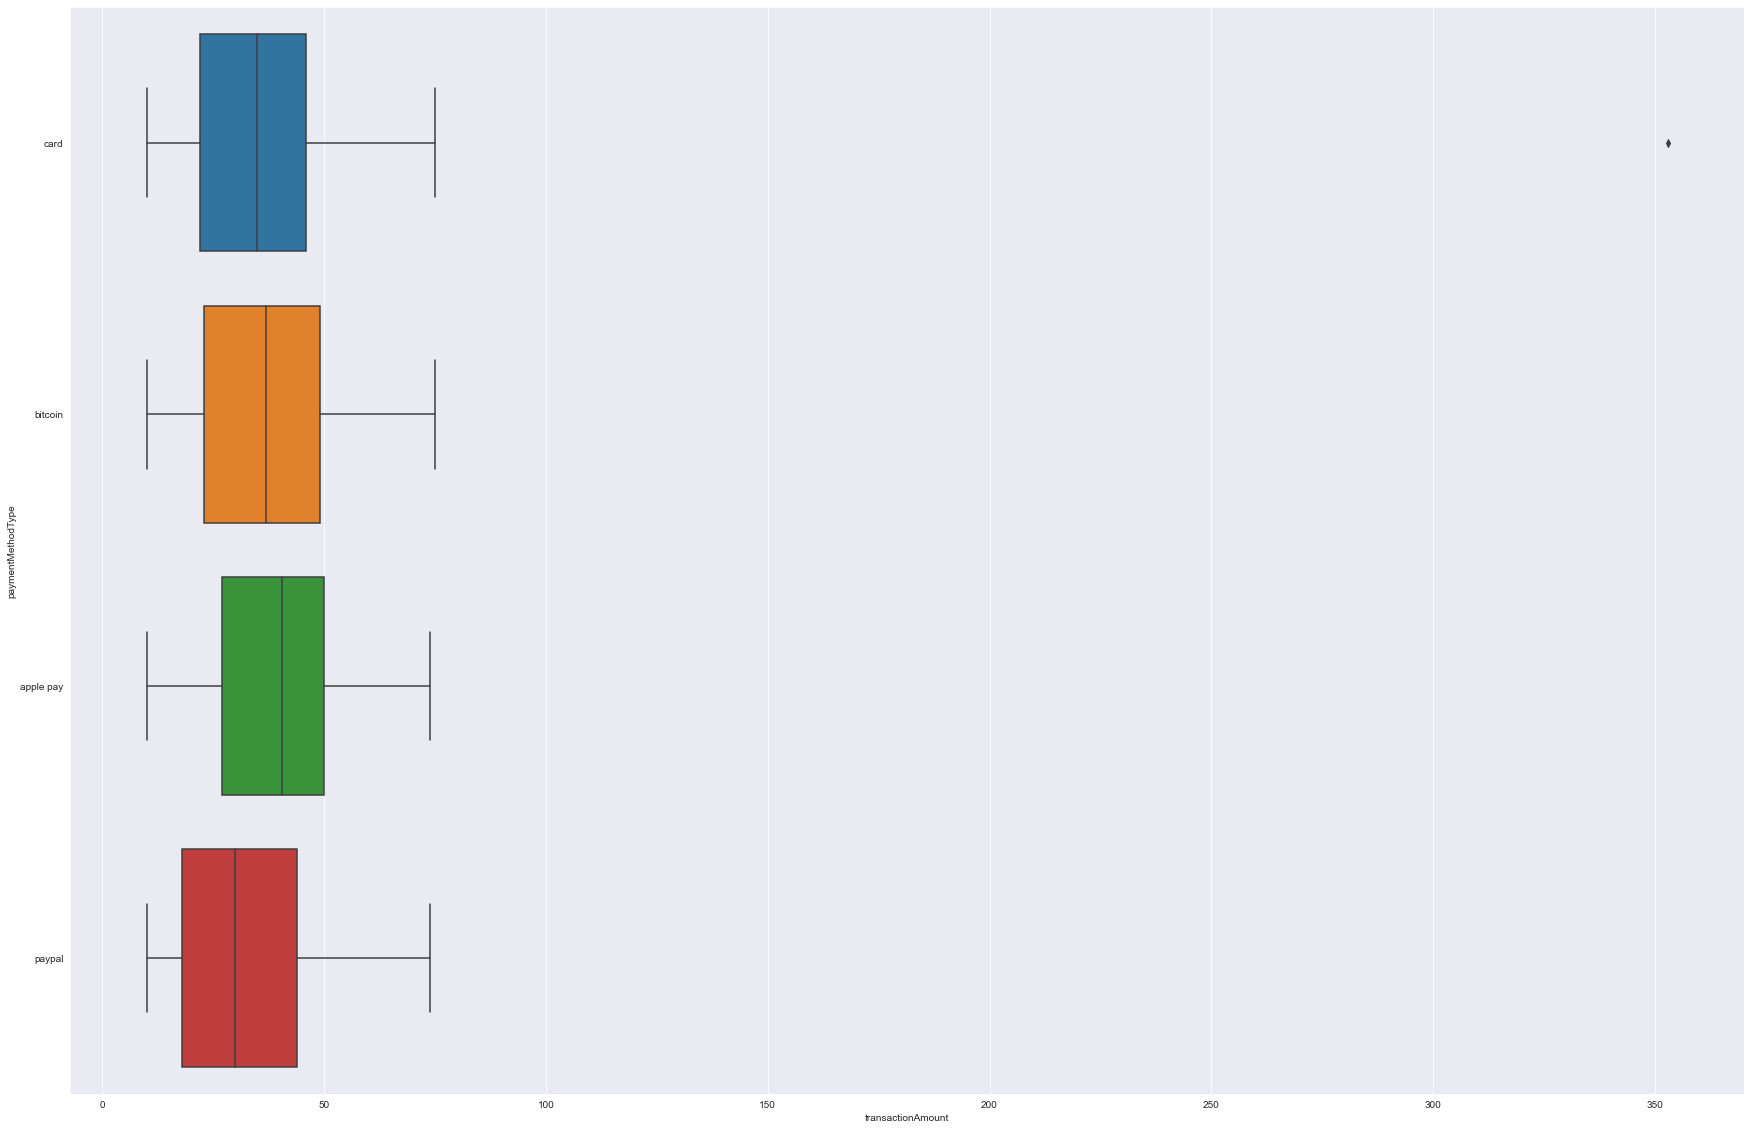

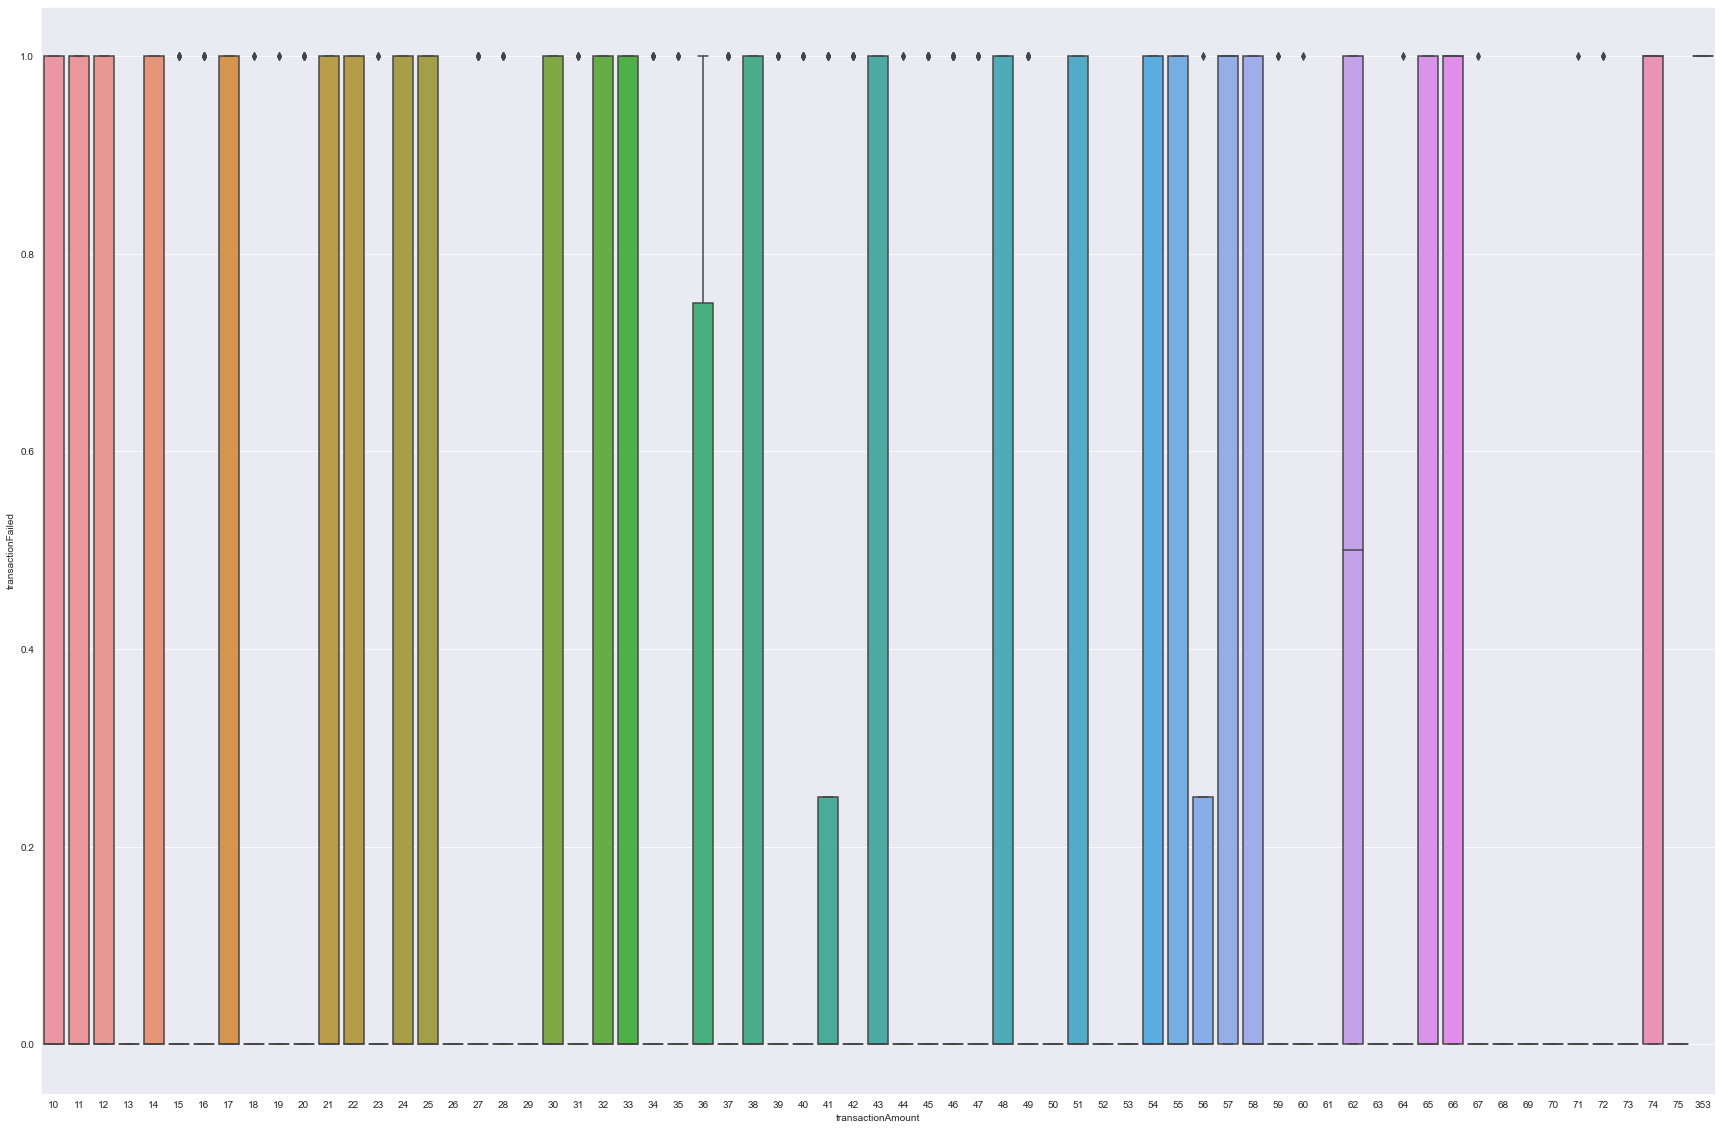

In [46]:
LLJ=['paymentMethodIssuer','paymentMethodProvider','paymentMethodType','transactionFailed']
for h in LLJ:
    sns.boxplot(y=h, x='transactionAmount', data=dataset_fraud)
    plt.rcParams["figure.figsize"] = (30,20)
    plt.show()

<h3><b style="color:blue;">Feature Extraction</b></h3>

In [47]:
dataset_fraud['domain_name'] = [s.split('@')[1] if len(s)!=0 else '@' for s in dataset_fraud['customer.customerEmail']]

<ipython-input-47-564f62d7a936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_fraud['domain_name'] = [s.split('@')[1] if len(s)!=0 else '@' for s in dataset_fraud['customer.customerEmail']]


In [48]:
dataset_fraud['fraudulent'] = [1 if s==True else 0 for s in dataset_fraud['fraudulent']]

<ipython-input-48-759f3861cc9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_fraud['fraudulent'] = [1 if s==True else 0 for s in dataset_fraud['fraudulent']]


In [49]:
dataset_fraud.drop(['customer.customerEmail'], axis=1,inplace=True)

C:\Users\Studies\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
colnames_ff=['transactionAmount', 'transactionFailed',
       'orderState','paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer','domain_name','fraudulent']
dataset_fraud=dataset_fraud[colnames_ff]

In [51]:
dataset_fraud.head()

,transactionAmount,transactionFailed,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,domain_name,fraudulent
0,18,False,pending,True,card,JCB 16 digit,Citizens First Banks,yahoo.com,0
1,26,False,fulfilled,True,card,JCB 16 digit,Citizens First Banks,yahoo.com,0
2,45,False,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,yahoo.com,1
3,45,False,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,yahoo.com,1
4,45,False,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,yahoo.com,1


<h2><b style="color:blue;">Encoding</b></h2>

In [52]:
L=['domain_name','transactionFailed','orderState','paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','paymentMethodIssuer']
for i in L :
    print(i,dataset_fraud[i].nunique())

domain_name 68
transactionFailed 2
orderState 3
paymentMethodRegistrationFailure 2
paymentMethodType 4
paymentMethodProvider 10
paymentMethodIssuer 19


<h3>Variables to encode:</h3>
<ul>
    <li>Domain name ( email )</li>
    <li>transactionFailed</li>
    <li>OrderState</li>
    <li>paymentMethodRegistrationFailure</li>
    <li>paymentMethodType</li>
    <li>paymentMethodProvider</li>
    <li>paymentMethodIssuer</li>
</ul>

<h3 style="color:blue;">Label Encoding pour les caractéristiques dont le nombre de valeurs uniques est &lt;= 2 </h3>

In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset_fraud['transactionFailed']= label_encoder.fit_transform(dataset_fraud['transactionFailed'])
label_encoder1 = preprocessing.LabelEncoder()
dataset_fraud['paymentMethodRegistrationFailure']= label_encoder1.fit_transform(dataset_fraud['paymentMethodRegistrationFailure'])

<h3 style="color:blue;">Dummies Encoding pour le reste des caractéristiques</h3>

In [54]:
dummies = pd.get_dummies(dataset_fraud[['orderState']] , drop_first=True)
dataset_fraud = pd.concat([dataset_fraud.drop(['orderState'],axis=1), dummies],axis=1)   

In [55]:
dummies = pd.get_dummies(dataset_fraud[['paymentMethodType']] , drop_first=True)
dataset_fraud = pd.concat([dataset_fraud.drop(['paymentMethodType'],axis=1), dummies],axis=1) 

In [56]:
dummies = pd.get_dummies(dataset_fraud[['paymentMethodIssuer']] , drop_first=True)
dataset_fraud = pd.concat([dataset_fraud.drop(['paymentMethodIssuer'],axis=1), dummies],axis=1) 

In [57]:
dummies = pd.get_dummies(dataset_fraud[['paymentMethodProvider']] , drop_first=True)
dataset_fraud = pd.concat([dataset_fraud.drop(['paymentMethodProvider'],axis=1), dummies],axis=1) 

In [58]:
dummies = pd.get_dummies(dataset_fraud[['domain_name']] , drop_first=True)
dataset_fraud = pd.concat([dataset_fraud.drop(['domain_name'],axis=1), dummies],axis=1)

In [59]:
dataset_fraud.head()

,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,fraudulent,orderState_fulfilled,...,domain_name_wolfe-brown.com,domain_name_wright-boyd.org,domain_name_wright.com,domain_name_yahoo.com,domain_name_young.com
0,18,0,1,0,0,...,0,0,0,1,0
1,26,0,1,0,1,...,0,0,0,1,0
2,45,0,1,1,1,...,0,0,0,1,0
3,45,0,0,1,1,...,0,0,0,1,0
4,45,0,0,1,1,...,0,0,0,1,0


<h2 style="color:blue;">Standardisation </h2>

In [60]:
import copy
data_fraud_test=copy.deepcopy(dataset_fraud)
data_fraud_test.drop("fraudulent",axis=1, inplace=True)

In [61]:
dataToScale = pd.DataFrame(data_fraud_test, columns =data_fraud_test.columns )

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('stdscale', StandardScaler(), dataToScale.columns)
    ], remainder='passthrough')

data_scaled = ct.fit_transform(dataToScale)

In [63]:
data_scaled = pd.DataFrame(data_scaled, columns=dataToScale.columns)

In [64]:
data_scaled['fraudulent']=dataset_fraud['fraudulent']

In [65]:
data_scaled.head()

,transactionAmount,transactionFailed,paymentMethodRegistrationFailure,orderState_fulfilled,orderState_pending,...,domain_name_wright-boyd.org,domain_name_wright.com,domain_name_yahoo.com,domain_name_young.com,fraudulent
0,-0.976607,-0.565685,3.047661,-2.557106,4.597743,...,-0.083117,-0.104798,2.437309,-0.075832,0
1,-0.544481,-0.565685,3.047661,0.391067,-0.217498,...,-0.083117,-0.104798,2.437309,-0.075832,0
2,0.481818,-0.565685,3.047661,0.391067,-0.217498,...,-0.083117,-0.104798,2.437309,-0.075832,1
3,0.481818,-0.565685,-0.328121,0.391067,-0.217498,...,-0.083117,-0.104798,2.437309,-0.075832,1
4,0.481818,-0.565685,-0.328121,0.391067,-0.217498,...,-0.083117,-0.104798,2.437309,-0.075832,1


<h2 style="color:blue;">Matrice de corrélation</h2>

In [66]:
data_scaled1=pd.DataFrame(data_scaled, columns=['transactionAmount','transactionFailed','paymentMethodRegistrationFailure','orderState_fulfilled','orderState_pending','paymentMethodType_bitcoin','paymentMethodType_card','domain_name_gmail.com','domain_name_gibson.com','fraudulent'])

In [67]:
corrs = data_scaled1.corr()

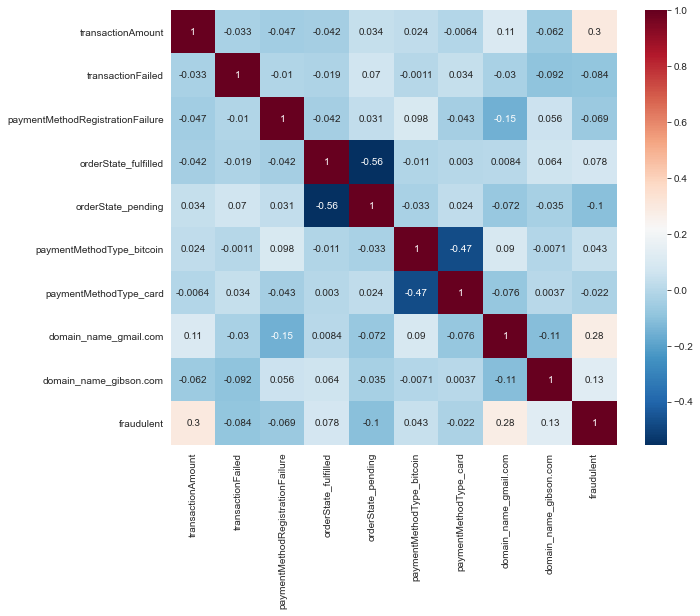

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

<h2><b>2-</b><b style="color:red;"> b) Facteurs qui influencent sur la prédiction du Flag Fraude</b></h2>

<h2 style="color:blue;">Feature Selection </h2>

In [69]:
import copy
data_fraud_test1=copy.deepcopy(data_scaled)
data_fraud_test1.drop("fraudulent",axis=1, inplace=True)

In [70]:
import numpy as py
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
kf = StratifiedKFold(n_splits=15,shuffle=True,random_state=42)

X = data_fraud_test1
y = dataset_fraud['fraudulent']

for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]

regressor = LinearRegression()
rfe_8 = RFE(regressor, n_features_to_select=8, step=1)
rfe_8.fit(xtr, ytr)
y_pred = rfe_8.predict(xvl)
print(r2_score(y_pred, yvl))

for i in range(xtr.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_8.support_[i], rfe_8.ranking_[i]))

-1.3204096110605046
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 74.000
Column: 2, Selected False, Rank: 72.000
Column: 3, Selected False, Rank: 37.000
Column: 4, Selected False, Rank: 76.000
Column: 5, Selected False, Rank: 28.000
Column: 6, Selected False, Rank: 25.000
Column: 7, Selected False, Rank: 44.000
Column: 8, Selected False, Rank: 39.000
Column: 9, Selected False, Rank: 29.000
Column: 10, Selected False, Rank: 51.000
Column: 11, Selected False, Rank: 49.000
Column: 12, Selected False, Rank: 16.000
Column: 13, Selected False, Rank: 42.000
Column: 14, Selected False, Rank: 48.000
Column: 15, Selected False, Rank: 52.000
Column: 16, Selected False, Rank: 22.000
Column: 17, Selected False, Rank: 50.000
Column: 18, Selected False, Rank: 86.000
Column: 19, Selected False, Rank: 33.000
Column: 20, Selected False, Rank: 60.000
Column: 21, Selected False, Rank: 92.000
Column: 22, Selected False, Rank: 70.000
Column: 23, Selected False, Rank: 84.000
Column: 

<b>Résultats:</b>

        Column: 0, Selected True, Rank: 1.000 / Transaction Amount
        Column: 53, Selected True, Rank: 1.000 / orderState_fulfilled
        Column: 55, Selected True, Rank: 1.000 / paymentMethodIssuer_Rose Bancshares
        Column: 65, Selected True, Rank: 1.000 / paymentMethodIssuer_Solace Banks
        Column: 78, Selected True, Rank: 1.000 / domain_name_arnold.com
        Column: 85, Selected True, Rank: 1.000 / domain_name_clark.com
        Column: 93, Selected True, Rank: 1.000 / domain_name_jedyz63t
        Column: 100, Selected True, Rank: 1.000 / domain_name_rasmussen-alvarado.com
        
<b>En gros, les features qui influencent sur la prédiction du flag Fraude sont : Transaction Amount / orderState/PaymentMethodIssuer et Domain name</b>

<h2><b>3- </b><b style="color:red;">Construction d'un modèle de prédiction du flag fraud, basé sur les features calculées en 1 </b></h2>

<h2 style="color:blue;">Modèle KNN </h2>

In [71]:
X = data_fraud_test1
y = dataset_fraud['fraudulent']

In [72]:
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(xtr,ytr)
    knn_predict = knn.predict(xvl)
    print('Accuracy score:',accuracy_score(yvl, knn_predict))
    cv_score.append(accuracy_score(yvl, knn_predict))
    print(classification_report(yvl,knn_predict))
    i+=1

1 of KFold 15
Accuracy score: 0.9829059829059829
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.97      0.99        72

    accuracy                           0.98       117
   macro avg       0.98      0.99      0.98       117
weighted avg       0.98      0.98      0.98       117

2 of KFold 15
Accuracy score: 0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        72

    accuracy                           0.97       117
   macro avg       0.98      0.97      0.97       117
weighted avg       0.98      0.97      0.97       117

3 of KFold 15
Accuracy score: 0.9743589743589743
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.97      0.99      0.98        72

    accuracy                       

In [73]:
Moyenne_KNN=sum(cv_score)/len(cv_score)
Moyenne_KNN

0.9639601139601138

0.9545454545454545

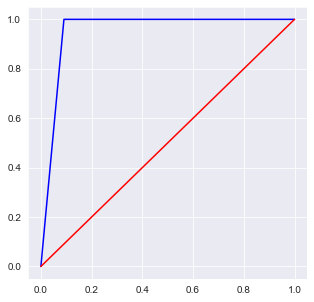

In [74]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds =  roc_curve(yvl,knn_predict)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(fpr,tpr,"b")
plt.plot([0,1],[0,1],"r-")
roc_auc_score(yvl,knn_predict)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve, f1_score,roc_auc_score
cm = confusion_matrix(yvl, knn_predict)
cm

array([[40,  4],
       [ 0, 72]], dtype=int64)

<h2 style="color:blue;">Modèle Logistic Regression </h2>

In [76]:
X = data_fraud_test1
y = dataset_fraud['fraudulent']

In [77]:
from sklearn.linear_model import LogisticRegression
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score1 =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    model = LogisticRegression()
    model.fit(xtr,ytr)
    y_pred = model.predict(xvl)
    print (f'Test Accuracy ',accuracy_score(yvl, y_pred))
    cv_score1.append(accuracy_score(yvl, y_pred))
    print(classification_report(yvl,y_pred))
    i+=1

1 of KFold 10
Test Accuracy  0.8971428571428571
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        68
           1       0.90      0.93      0.92       107

    accuracy                           0.90       175
   macro avg       0.90      0.89      0.89       175
weighted avg       0.90      0.90      0.90       175

2 of KFold 10
Test Accuracy  0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.94      0.96      0.95       107

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175

3 of KFold 10
Test Accuracy  0.9257142857142857
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        68
           1       0.96      0.92      0.94       107

    accuracy                          

In [78]:
Moyenne_LR=sum(cv_score1)/len(cv_score1)
Moyenne_LR

0.9153858784893266

0.9225136002231832

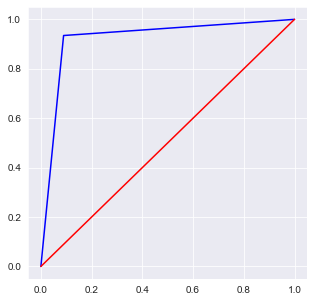

In [79]:
fpr,tpr,thresholds =  roc_curve(yvl,y_pred)
plt.plot(fpr,tpr,"b")
plt.plot([0,1],[0,1],"r-")
roc_auc_score(yvl,y_pred)

<h2 style="color:blue;">Modèle Décision Tree </h2>

In [80]:
X = data_fraud_test1
y = dataset_fraud['fraudulent']

In [81]:
from sklearn.tree import DecisionTreeClassifier
pred_test_full =0
cv_score2 =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    dt = DecisionTreeClassifier()
    dt.fit(xtr, ytr)
    dt_predict = dt.predict(xvl)
    print('Accuracy score:',accuracy_score(yvl, dt_predict))
    cv_score2.append(accuracy_score(yvl, dt_predict))
    print(classification_report(yvl,dt_predict))
    i+=1

1 of KFold 10
Accuracy score: 0.9542857142857143
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.96      0.96      0.96       107

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175

2 of KFold 10
Accuracy score: 0.96
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.98      0.95      0.97       107

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

3 of KFold 10
Accuracy score: 0.9314285714285714
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        68
           1       0.94      0.94      0.94       107

    accuracy                           0.93      

In [82]:
Moyenne_DT=sum(cv_score2)/len(cv_score2)
Moyenne_DT

0.952535303776683

0.934649183986609

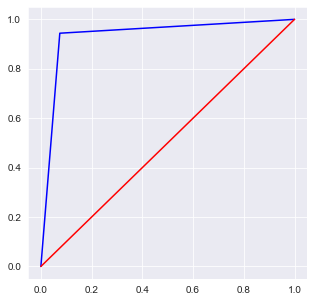

In [83]:
fpr,tpr,thresholds =  roc_curve(yvl,dt_predict)
plt.plot(fpr,tpr,"b")
plt.plot([0,1],[0,1],"r-")
roc_auc_score(yvl,dt_predict)

<h2 style="color:blue;">Modèle Naive Bayes </h2>

In [84]:
X = data_fraud_test1
y = dataset_fraud['fraudulent']

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
pred_test_full =0
cv_score3 =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    GNB_classifier = GaussianNB()
    GNB_classifier.fit(xtr, ytr)
    GNB_predict = GNB_classifier.predict(xvl)
    print('Accuracy score:',accuracy_score(yvl, GNB_predict))
    cv_score3.append(accuracy_score(yvl, GNB_predict))
    print(classification_report(yvl,GNB_predict))
    i+=1

1 of KFold 10
Accuracy score: 0.8228571428571428
              precision    recall  f1-score   support

           0       0.70      0.94      0.81        68
           1       0.95      0.75      0.84       107

    accuracy                           0.82       175
   macro avg       0.83      0.84      0.82       175
weighted avg       0.86      0.82      0.83       175

2 of KFold 10
Accuracy score: 0.8285714285714286
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        68
           1       0.80      0.96      0.87       107

    accuracy                           0.83       175
   macro avg       0.86      0.79      0.80       175
weighted avg       0.84      0.83      0.82       175

3 of KFold 10
Accuracy score: 0.8228571428571428
              precision    recall  f1-score   support

           0       0.97      0.56      0.71        68
           1       0.78      0.99      0.87       107

    accuracy                       

In [86]:
Moyenne_NB=sum(cv_score3)/len(cv_score3)
Moyenne_NB

0.7964663382594417

0.7695633979634539

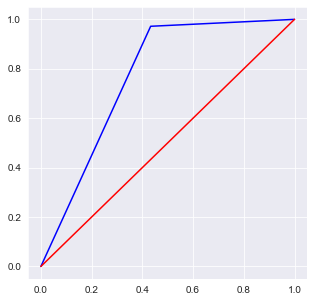

In [87]:
fpr,tpr,thresholds =  roc_curve(yvl,GNB_predict)
plt.plot(fpr,tpr,"b")
plt.plot([0,1],[0,1],"r-")
roc_auc_score(yvl,GNB_predict)

<h2><b>4- </b><b style="color:red;">Production des métriques d’évaluation de la performance du modèle, et des features discriminantes.</b></h2>

<b>L'évaluation des modèles a été faite à l'aide:
    <ul style=color:blue>
    <li>stratification</li>
    <li>validation croisée</li>
    <li>Accuracy</li>
    <li>Recall</li>
    <li>F1-score</li>
    <li>Courbe ROC</li>
    </ul></b>

<h1><b>FIN</b></h1>